ADITYA V
220082
SENTIMENT ANALYSIS SUBMISSION

First of all, we import all the necessary modules. I will be working with nltk for the language processing part and sklearn for the ML part of it.

In [70]:
import numpy as np
import pandas as pd
import string
import re

import nltk.corpus
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer



Now , it's time to read the 2 files we will be using in this task.

In [71]:
tweets = pd.read_csv("train.csv")
test_tweets = pd.read_csv("test.csv")
tweets.head()



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


First of all we need to clean the dataframe. The tweets contain a lot of useless features like usernames, website links, punctuations, etc. We will remove these features, apart from converting all the text to lowercase. This is because our ML model will only need vocabulary and frequency of words to work.

In [72]:
stopwords = nltk.corpus.stopwords.words('english')
def clean(text):
    text = text.lower()
    text = "".join(char for char in text if ((char in "[abcdefghijklmnopqrstuvwxyz1234567890 ]") or (char in string.punctuation)))
    text = re.sub("http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub("@\S+|","",text)
    text = "".join(char for char in text if char not in (string.punctuation))
    return text





In [73]:
tweets['clean'] = tweets['tweet'].apply(clean)
test_tweets['clean'] = test_tweets['tweet'].apply(clean)
tweets

,id,label,tweet,clean
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


Now it's time to complete the cleaning. We reduce variations of words to their root word based on lemma, or origin. Like cat and cats will both be reduced to cat. We also remove stopwords, like it, on , etc which are useless for classification.

In [74]:
def lemmatize_and_remove_stopwords(text):
    tokens = [token for token in nltk.tokenize.word_tokenize(text) if token not in stopwords]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text  = " ".join(word for word in tokens)
    return text

    

In [75]:
tweets['Tokens'] = tweets['clean'].apply(lemmatize_and_remove_stopwords)
test_tweets['Tokens'] = test_tweets['clean'].apply(lemmatize_and_remove_stopwords)
tweets

,id,label,tweet,clean,Tokens
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...,sikh temple vandalised calgary wso condemns act


Now starts the ML part. Being a beginner, I will just be using the Logistic Regression function provided by Sklearn. Before that we need to convert the textual data to a numerical form. CountVectorizer basically creates a 2d array where ndex of the word in the vocab created and its frequency of ocurrence in a given word will be stored. Based on this we will train the logistic regression model and predict outputs.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(tweets['Tokens'])
y = tweets['label']
xoftest = cv.transform(test_tweets['Tokens'])


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3)
logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)



LogisticRegression()

As we can see, the model did fairly well. It has a good degree of precision, although the recall value is quite low for positives, this is probably because the model isnt trained well enough to identify certain aspects of hate speech, which makes sense as logistic regression would'nt be as precise as deep learning or some other , more complex ML model. 

In [78]:
predictions = logmodel.predict(x_test)

print(classification_report(y_test,predictions))
print("ROC_AUC score = ",roc_auc_score(y_test,predictions))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8929
           1       0.87      0.50      0.63       660

    accuracy                           0.96      9589
   macro avg       0.92      0.75      0.81      9589
weighted avg       0.96      0.96      0.96      9589

ROC_AUC score =  0.7471441370814201


<Axes: >

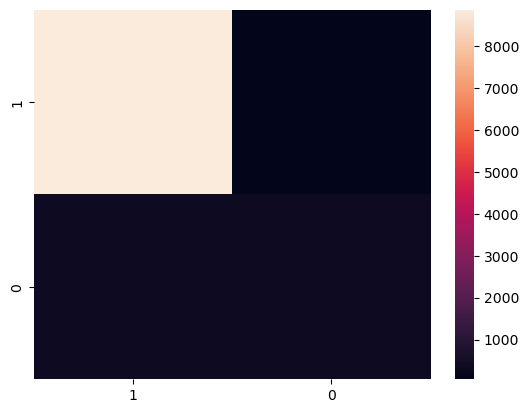

In [79]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,xticklabels = [1,0],yticklabels = [1,0])

As the test database given does not provide as with labels, we will be unable to check how precise it is on the test database. Still, we can use our model to make a reasonable guess as to whether the tweet is "hate speech" or not and mark them with labels as done below.

In [82]:
predictions = logmodel.predict(xoftest)
test_tweets['labels'] = predictions
test_tweets.drop(['clean','Tokens'],axis=1)

    

,id,tweet,labels
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


Thank You !!